## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.7.0**. Please **DO NOT** use v1.0.0 **unless you know what you are doing**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to bCourses

You can **either** name it as

lastname_firstname_1.ipynb (if you **only** have a notebook file)

**or**

lastname_firstname_1.zip (if you have **more than one** files)

## Problem 1

Consider $u'(t)=f(u(t)),u(0)=u_0$, and $f:\mathbb{R}^{d}\to \mathbb{R}$ 
is Lipschitz continuous with a
Lipschitz constant $L$. Let $\max \Vert u''(t)\Vert$ be bounded by a constant $M$ for $0\le t\le T$. Prove that the backward Euler method converges as the step size $h\to 0$.

The scheme of backward Euler method is,
$$
u_{n+1} = u_n + f(u_{n+1},t_{n+1})h
$$

Assume the exact solution at time step n is $u_n$ and the numerically approximated solution is $u(t_n)$,

According to backward Euler method,

$$
u_{n+1} = u_n + f(u_{n+1},t_{n+1})h\\
u(t_{n+1}) = u(t_n) + f(u(t_{n+1}),t_{n+1})h + \tau_n
$$

Subtracting between above two equations gives,

$$
[u(t_{n+1}) - u_{n+1}] = [u(t_n) - u_n] + [f(u(t_{n+1}),t_{n+1})h - f(u_{n+1},t_{n+1})h] + \tau_n\\
e_{n+1} = e_n + h[f(u(t_{n+1}),t_{n+1}) - f(u_{n+1},t_{n+1})]+ \tau_n
$$

As $f$ is Lipschitz continuous with the Lipschitz constant $L$, that is, $||f(u(t_{n+1}),t_{n+1}) - f(u_{n+1},t_{n+1})|| \leqslant L||u(t_{n+1})-u_{n+1}|| = L||e_{n+1}||$,

$$
||e_{n+1}|| \leqslant ||e_n||+hL||e_{n+1}||+||\tau_n||\\
(1-hL)||e_{n+1}|| \leqslant ||e_n||+||\tau_n||
$$

As $h\rightarrow 0$ and $L$ is a finite number, $(1-hL)>0$,

$$
||e_{n+1}|| \leqslant \frac{1}{1-hL}||e_n||+\frac{1}{1-hL}||\tau_n||\\
||e_{n+1}|| \leqslant (\frac{1}{1-hL})^{2}||e_{n-1}||+(\frac{1}{1-hL})^{2}||\tau_{n-1}||+\frac{1}{1-hL}||\tau_n||\\
||e_{n+1}|| \leqslant (\frac{1}{1-hL})^{n+1}||e_0||+[(\frac{1}{1-hL})^{n+1}||\tau_{0}||+(\frac{1}{1-hL})^{n}||\tau_{1}||+\cdots +\frac{1}{1-hL}||\tau_n||]
$$

The local truncation error is,

$$
\tau_n = u(t_{n+1})-u(t_n)-u'(t_{n+1})h
$$

Use Taylor series expansion on $u(t_n)$, 

$$
u(t_n) = u(t_{n+1}-h)=u(t_{n+1})-u'(t_{n+1})h+\int_{t_{n+1}}^{t_n}(t_n-s)u''(s)ds
$$

Thus the local truncation error,
$$
\tau_n = u(t_{n+1})-[u(t_{n+1})-u'(t_{n+1})h+\int_{t_{n+1}}^{t_n}(t_n-s)u''(s)ds]-u'(t_{n+1})h=-\int_{t_{n+1}}^{t_n}(t_n-s)u''(s)ds
$$

As $max||u(t)||$ is bounded by $M$ for $0 \leqslant t \leqslant T$,

$$
||\tau_n||\leqslant [\int_{t_{n+1}}^{t_n}(t_n-s)ds]M = \frac{h^2M}{2}
$$

Thus for the error at nth step,

$$
||e_n|| \leqslant (\frac{1}{1-hL})^{n}||e_0||+[(\frac{1}{1-hL})^{n}||\tau_{0}||+(\frac{1}{1-hL})^{n-1}||\tau_{1}||+\cdots +\frac{1}{1-hL}||\tau_{n-1}||]\\
||e_n|| \leqslant (\frac{1}{1-hL})^{n}||e_0||+(\frac{h^2M}{2})\frac{(1-hL)^{-n}-1}{hL} = (1-hL)^{-n}||e_0||+[\frac{(1-hL)^{-n}-1}{2L}M]h
$$

As $1+x\leqslant e^x$, 

$$
(1-hL)^{-n}\leqslant e^{(-hL)(-n)}=e^{nhL}=e^{LT}
$$

Thus,
$$
||e_n|| \leqslant e^{LT}||e_0||+(\frac{e^{LT}-1}{2L}M)h
$$

Therefore, the backward Euler method converges as the step size $h\to 0$.

## Problem 2

Consider the initial value problem
$$
\begin{split}
u'_{1} &= u_{1},\\
u'_{2} &= u_{1} - u_{2},\\
\end{split}
$$
with initial condition $(u_{1}(0),u_{2}(0))=(1,1)$. 

1. Find a way to solve the problem above analytically, and write down the answer of u(T=2.0).

2. Solve the problem numerically using the trapezoidal rule. Verify that the solution agrees with the exact solution at time $T=2.0$. Use a number of step sizes $h=2^{-i},i=5,\ldots,10.$ Plot the error $e=\Vert u(1)-u^*(1)\Vert_2$ v.s. step size $h$ in a loglog plot, and estimate the convergence rate for each scheme.

**Note**: the routine for computing the error, plotting and computing the slope is provided. 

1.
First to solve $\ u_1$,
$$
u_1' = u_1, \text{that is},
\frac{du_1}{dt}=u_1,\ \ \frac{du_1}{u}=dt,\ \ \int \frac{du_1}{u}=\int dt,\\
ln(u_1) + C_1 = t, \ u_1 = e^{t-C_1}
$$
According to initial condition,
$$
\ u_1(0) = e^{0-C_1} = e^{-C_1} = 1, \ C_1 = 0,\\
u_1 = e^{t},
$$


Then to solve $u_2,\ u_2' = u_1 - u_2 = e^{t} - u_2,$ first to solve homogeneous part,
$$
\frac{du_{2H}}{dt} + u_{2H} = 0,\ \ \frac{du_{2H}}{u_{2H}}=-dt,\ \ \int \frac{du_{2H}}{u_{2H}}=-\int dt,\\
ln(u_{2H}) + C_2' = -t, \ u_{2H} = e^{-t-C_2'} = e^{-t} \cdot e^{-C_2'} = C_2e^{-t},
$$
Then to solve paticular part,$\frac{du_{2P}}{dt} + u_{2P} = e^{t},$
pick $u_{2P} = Ae^{t},$
$$
Ae^{t} + Ae^{t} = e^{t},\ A = 0.5,\ u_{2P} = 0.5e^{t},\\
u_2 = u_{2H}+u_{2P} = C_2e^{-t} + 0.5e^{t},
$$
According to initial condition, 
$$
u_2(0) = C_2e^{0} + 0.5e^{0} = C_2 + 0.5 = 1, \ C_2 = 0.5,\\
u_2 = 0.5e^{-t} + 0.5e^{t},\\
$$
Thus the analytical solution of the initial value problem is,
$$
(u_1, u_2) = (e^{t},\ 0.5e^{-t} + 0.5e^{t}),\\
u(T=2.0)=(e^{2.0},\ 0.5e^{-2.0} + 0.5e^{2.0}) = (7.389,\ 3.762).
$$

uexact = [7.38906, 3.7622]
step size = 0.0625, utrape = [7.39387, 3.87769], err = 0.11559826887560119
step size = 0.03125, utrape = [7.39026, 3.8194], err = 0.057214171378512896
step size = 0.015625, utrape = [7.38936, 3.79066], err = 0.02846843579614905
step size = 0.0078125, utrape = [7.38913, 3.7764], err = 0.014200504249383475
step size = 0.00390625, utrape = [7.38907, 3.76929], err = 0.00709194236433218
step size = 0.001953125, utrape = [7.38906, 3.76574], err = 0.0035439085781849497


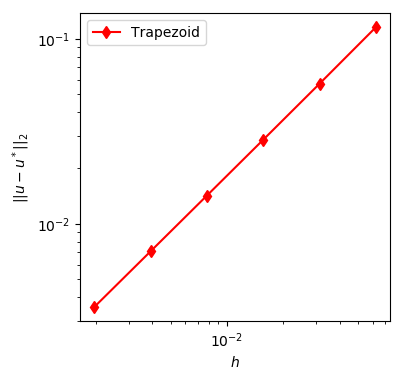

Slope for Trapezoid = 1.005526919116801


In [1]:
using LinearAlgebra
using PyPlot

function Trapezoid(N,T,u0)
    u = copy(u0)
    unew = copy(u0)
    dt = T/N
    for i = 1 : N
        unew[1] = (u[1]+dt/2*u[1])/(1-dt/2)
        unew[2] = (u[2]+dt/2*(u[1]-u[2]+unew[1]))/(1+dt/2)
        u = unew
    end
    return u
end

u0 = [1.0,1.0]
T = 2.0
# You need to compute uexact at T=2.0
uexact = [exp(T), 0.5*(exp(T)+exp(-T))]
println("uexact = ", uexact)

# Plotting routine provided below
NList = 2 .^(5:10)
errTrapeList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    utrape = Trapezoid(N,T,u0)
    errTrapeList[i] = norm(utrape-uexact)
    println("step size = ", T/N, ", utrape = ", utrape, ", err = ", errTrapeList[i])
end

figure(1,figsize=(4,4))
loglog(T./NList, errTrapeList, "r-d", label="Trapezoid")
xlabel(L"h")
ylabel(L"||u-u^*||_2")
legend()

slopeTrape = -(log(errTrapeList[end])-log(errTrapeList[1])) / 
(log(NList[end]) - log(NList[1]))

println("Slope for Trapezoid = ", slopeTrape )

## Problem 3

Consider a simple pendulum of length $l$, forming an angle $\theta(t)$ with the
vertical axis. The equation of motion for the pendulum is given by

$$\theta''(t)+\frac{g}{l} \sin(\theta(t))=0,$$

where $g$ is the gravitational constant, with given initial conditions

$$\theta(0)=\theta_0,\quad \theta'(0)=\omega_0.$$

1. Rewrite the equation as a system of first order equations in $u(t)=(\theta(t),\omega(t))$. Fill the `func` function below. 

2. Write a forward Euler method. Use a sufficiently small time step, and plot the solution of $\theta(t)$ with $g=l=1$ and initial condition $(\theta(0),\omega(0))=(2.5,0.0)$ till $T=25$. Since no exact solution is available, measure the convergence rate by means of the solution at T=25 obtained from three time steps h, h/2, and h/4.

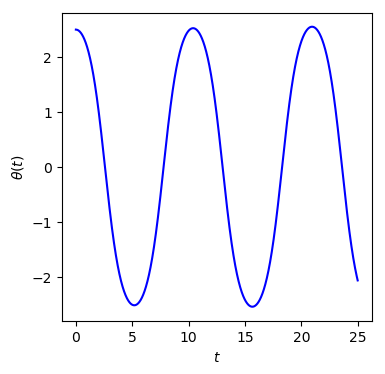

PyObject Text(26,0.5,'$\\theta(t)$')

In [1]:
function func(u,g,l)
    # fill here for evaluating f(u)
    uo = copy(u)
    ud = copy(u)
    ud[1] = uo[2]
    ud[2] = -g/l*sin(uo[1])
    return ud
end

function ForwardEulerFull(N,T,u0,g,l)
    # Fill code here. 
    # The output should be the full history of the solution
    # i.e. the output u should be of size 2×(N+1)
    # This is of course memory intensive and is not the 
    # commonly used approach
    u = zeros(2,N+1)
    u[:, 1]= copy(u0)
    unew = copy(u0)
    dt = T/N
    for i = 1:N
        unew = u[:, i] + dt * func(u[:, i], g, l)
        u[:, i + 1] = unew
    end
    return u
end

# This should plot out the solution
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

uEulerFull = ForwardEulerFull(N,T,u0,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(uEulerFull[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

In [7]:
function ForwardEuler(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    u = copy(u0)
    unew = copy(u0)
    dt = T/N
    for i = 1 : N
        unew = u + dt * func(u, g, l)
        u = unew
    end
    return u
end

# Estimate the order of convergence
using LinearAlgebra
g=1.0
l=1.0
T=25.0
N=100000
u0=[2.5,0.0]

uEulerH = ForwardEuler(N,T,u0,g,l)
println("The solution at T=25 is ", uEulerH)
uEulerHd2 = ForwardEuler(2*N,T,u0,g,l)
uEulerHd4 = ForwardEuler(4*N,T,u0,g,l)
p = log10(norm(uEulerH - uEulerHd2, 2)/norm(uEulerHd2 - uEulerHd4, 2))/log10(2)
println("The order of convergence is ", p)

The solution at T=25 is [-2.27995, -0.554471]
The order of convergence is 1.0196139778528046


## Problem 4

1. Repeat Problem 3.2 using the trapezoidal rule. Modify your implementation in Problem 2 if needed.

2. Repeat Problem 3.2 using the Adams-Bashforth 3 (AB3) scheme. Obtain the first two steps using forward Euler and trapezoidal rule, respectively. Observe the difference in terms of the convergence rate.



In [15]:
using LinearAlgebra

# Need to solve the nonlinear equation in trapezoidal rule.
function Trapezoid(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    u = copy(u0)
    unew = copy(u0)
    dt = T/N
    tolerance = 1e-20
    for i = 1 : N
        uiter = copy(u0)
        e = [1 1]
        while(norm(e[1], 2)>tolerance || norm(e[2], 2)>tolerance)
            uiter = u + dt/2 * (func(u,g,l) + func(uiter,g,l))
            e = uiter - (u + dt/2 * (func(u,g,l) + func(uiter,g,l)))
        end
        unew = uiter
        u = unew
    end
    return u
end

# Estimate the order of convergence
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

utrapeH = Trapezoid(N,T,u0,g,l)
println("The solution at T=25 is ", utrapeH)
uTrapeHd2 = Trapezoid(2*N,T,u0,g,l)
uTrapeHd4 = Trapezoid(4*N,T,u0,g,l)
p = log10(norm(utrapeH - uTrapeHd2, 2)/norm(uTrapeHd2 - uTrapeHd4, 2))/log10(2)
println("The order of convergence is ", p)


The solution at T=25 is [-2.2963, -0.524659]
The order of convergence is 2.000002100577141


In [19]:
# Need some method to compute u1,u2
function AB3(N,T,u0,u1,u2,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    uoo = copy(u0)
    uo = copy(u1)
    u = copy(u2)
    unew = copy(u2)
    dt = T/N
    for i = 3 : N
        unew[1] = u[1] + dt * (5/12*uoo[2] - 4/3*uo[2] + 23/12*u[2])
        unew[2] = u[2] + dt * (-g/l) * (5/12*sin(uoo[1]) - 4/3*sin(uo[1]) + 23/12*sin(u[1]))
        uoo = copy(uo)
        uo = copy(u)
        u = copy(unew)
    end
    return u
end

# Estimate the order of convergence
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

u1Euler = ForwardEuler(1,T/N*1,u0,g,l)
u2Euler = ForwardEuler(2,T/N*2,u0,g,l)
u1EulerHd2 = ForwardEuler(1,T/(2*N)*1,u0,g,l)
u2EulerHd2 = ForwardEuler(2,T/(2*N)*2,u0,g,l)
u1EulerHd4 = ForwardEuler(1,T/(4*N)*1,u0,g,l)
u2EulerHd4 = ForwardEuler(2,T/(4*N)*2,u0,g,l)

uAB3EH = AB3(N,T,u0,u1Euler,u2Euler,g,l)
println("Using forward Euler to obtain first two steps,")
println("The solution at T=25 is ", uAB3EH)
uAB3EHd2 = AB3(2*N,T,u0,u1EulerHd2,u2EulerHd2,g,l)
uAB3EHd4 = AB3(4*N,T,u0,u1EulerHd4,u2EulerHd4,g,l)
pE = log10(norm(uAB3EH - uAB3EHd2, 2)/norm(uAB3EHd2 - uAB3EHd4, 2))/log10(2)
println("The order of convergence is ", pE)

println(" ")

u1Trape = Trapezoid(1,T/N*1,u0,g,l)
u2Trape = Trapezoid(2,T/N*2,u0,g,l)
u1TrapeHd2 = Trapezoid(1,T/(2*N)*1,u0,g,l)
u2TrapeHd2 = Trapezoid(2,T/(2*N)*2,u0,g,l)
u1TrapeHd4 = Trapezoid(1,T/(4*N)*1,u0,g,l)
u2TrapeHd4 = Trapezoid(2,T/(4*N)*2,u0,g,l)

uAB3TH = AB3(N,T,u0,u1Trape,u2Trape,g,l)
println("Using trapezoidal rule to obtain first two steps,")
println("The solution at T=25 is ", uAB3TH)
uAB3THd2 = AB3(2*N,T,u0,u1TrapeHd2,u2TrapeHd2,g,l)
uAB3THd4 = AB3(4*N,T,u0,u1TrapeHd4,u2TrapeHd4,g,l)
pT = log10(norm(uAB3TH - uAB3THd2, 2)/norm(uAB3THd2 - uAB3THd4, 2))/log10(2)
println("The order of convergence is ", pT)

Using forward Euler to obtain first two steps,
The solution at T=25 is [-2.29628, -0.524693]
The order of convergence is 1.9684150663692719
 
Using trapezoidal rule to obtain first two steps,
The solution at T=25 is [-2.2963, -0.524656]
The order of convergence is 3.000052538061663
